# Overview of BB84 Quantum Key Distribution

The BB84 quantum key distribution algorithm is a cryptographic protocol that enables two parties, Alice and Bob, to securely exchange a secret key over a potentially insecure communication channel while detecting any eavesdropping by an adversary, Eve. BB84's security is based on the principles of quantum mechanics.

## Algorithm Steps:

1. **Key Preparation:**
    - Alice generates a random sequence of bits (the raw key).
    - She encodes each bit onto a quantum state using one of two bases: the standard basis (0/1) or the Hadamard basis (H0/H1).
    - Alice sends these qubits to Bob.
    <br>

2. **Measurement:**
    - Bob randomly chooses a basis (either standard or Hadamard) to measure each received qubit.
    - Bob records his measurement outcomes.
    <br>

3. **Basis Matching:**
    - Alice and Bob publicly compare the bases they used for encoding and measuring each qubit.
    - They reveal only the positions where they used the same basis.

4. **Error Detection:**
    - Alice and Bob discard qubits for which they used different bases since they are not guaranteed to be in the same state.
    - They randomly select a subset of the remaining matching qubits to compare their values.
    - If the values match, it indicates no eavesdropping; if they don't match, it suggests the presence of an eavesdropper.

5. **Final Key Generation:**
    - The subset of matching qubits that passed the error detection test forms the secret key shared between Alice and Bob.
    - This key is information-theoretically secure.

6. **Security Analysis:**
    - Alice and Bob estimate the level of security by comparing a subset of their keys.
    - If the error rate is too high, it indicates potential eavesdropping.

7. **Privacy Amplification (Optional):**
    - If the security analysis indicates potential eavesdropping, Alice and Bob can perform privacy amplification to further reduce the key's length and enhance its security.
    
Key Principles:

-   The security of BB84 relies on the fundamental principles of quantum mechanics, specifically the no-cloning theorem. Attempting to eavesdrop on a quantum state will inevitably introduce errors, which can be detected.

-   By comparing their measurement bases and outcomes, Alice and Bob can detect any eavesdropping attempts and ensure the security of their key.

-   BB84 provides a provably secure way to establish a secret key between two parties, even in the presence of a potential eavesdropper.

In summary, the BB84 algorithm exploits the unique properties of quantum states to establish a secret key between Alice and Bob, ensuring the security of their communication by detecting any unauthorized interference.

The BB84 protocol leverages the fundamental principles of quantum mechanics to achieve secure key distribution, making it a cornerstone of quantum cryptography.

For an example implementation of BB84 using Qiskit and SageMath, please refer to the code below.


### 1\. Import Libraries


In this section, we import the necessary libraries for visualizing the quantum circuit and performing random operations.

In [1]:
# from sage.stats.distributions.discrete_gaussian_integer import DiscreteGaussianDistributionIntegerSampler
#from sage.crypto.util import random_primes
from sage.crypto.util import ascii_to_bin, bin_to_ascii
#from sage.stats.distributions.discrete_random_variable import DiscreteRandomVariable
from sage.plot.plot3d.base import Graphics3d
#from sage.plot.plot3d.shapes2 import Line2d, Text2d, Point2d
from sage.plot.plot3d.shapes import *
from sage.plot.point import Point
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from graphviz import Digraph
from IPython.display import Image
import numpy as np
import random

### 2\. Set the Number of Qubits


We define the number of qubits for the BB84 simulation. In this case, we've set it to 100, which represents the number of qubits Alice and Bob will use in their quantum communication.

In [2]:
# Set the number of qubits
n = 20

### 3\. Define Functions

#### `generate_random_bits(num_bits)`

This function generates random bits for Alice and Bob:

In [3]:
# Function to create random binary bits for Alice and Bob
def generate_random_bits(num_bits):
    return [random.choice(['0', '1']) for _ in range(num_bits)]

#### `alice_prepare_qubits(num_qubits)`

This function simulates Alice's preparation of qubits for quantum communication. Let's break down the key concepts:

-   Qubits: Quantum bits, the fundamental units of quantum information, represented as two-dimensional vectors.
-   Bases: In quantum key distribution, Alice chooses the basis (either 'rectilinear' or 'diagonal') for each qubit. The basis determines how the qubit is encoded.

In [4]:
# Function to create a random basis for Alice
def alice_prepare_qubits(num_qubits):
    qubits = []
    bases = []
    for _ in range(num_qubits):
        basis = random.choice(['rectilinear', 'diagonal'])
        bases.append(basis)
        qubit = [1, 0]  # Start with |0> state
        if basis == 'diagonal':
            qubit = [1 / sqrt(2), 1 / sqrt(2)]  # Apply Hadamard gate for diagonal basis
        qubits.append(qubit)
    return qubits, bases

#### `bob_measure_qubits(qubits, bases, bob_bits)`

This function simulates Bob's measurement of qubits. Let's explore the concepts:

-   Measurement: In quantum mechanics, measuring a qubit in a particular basis reveals its state with a certain probability. Bob measures each qubit in the basis chosen by Alice.
-   Probability: The probability of measuring a specific outcome ('0' or '1') is calculated based on the overlap of the qubit state with the chosen basis.
-   Outcome: The result of each measurement, '0' or '1', is determined by comparing the probability with a random number generated by Bob.

In [5]:
# Function to simulate Bob's measurement of qubits
def bob_measure_qubits(qubits, bases, bob_bits):
    measurements = []
    for i in range(len(qubits)):
        basis = bases[i]
        qubit = qubits[i]
        probability = abs(sum(qubit[i] * basis_states[basis][i] for i in range(2)))**2
        outcome = bob_bits[i]  # Use Bob's bits instead of random measurements
        measurements.append(outcome)
    return measurements

#### `perform_error_detection(alice_bits, bob_bits)`

This function performs error detection to evaluate the security of the quantum key distribution. Key concepts include:

-   Matching Bits: The bits shared between Alice and Bob are compared to check if they match. Matching bits are stored for analysis.
-   Error Rate: The error rate is calculated by counting the bits that do not match between Alice and Bob's bits and dividing by the total number of bits.

In [6]:
# Function to perform error detection
def perform_error_detection(alice_bits, bob_bits):
    matching_bits_alice = []
    matching_bits_bob = []
    
    for alice_bit, bob_bit in zip(alice_bits, bob_bits):
        matching_bits_alice.append(alice_bit)
        matching_bits_bob.append(bob_bit)
    
    error_rate = sum(1 for a, b in zip(matching_bits_alice, matching_bits_bob) if a != b) / len(matching_bits_alice)
    
    return matching_bits_alice, matching_bits_bob, error_rate

### 4\. Visualizing the Quantum Circuit

This function visualizes the quantum circuit by creating 3D representations of qubits, bases, and measurement outcomes. The key concepts are:

-   Qubit Visualization: Qubits are represented as points in 3D space, colored in blue for '0' measurements and red for '1' measurements.
-   Basis and Measurement Visualization: The basis and measurement outcomes are displayed as text labels above and below each qubit, respectively.
-   Lines: Lines are drawn to connect the qubits, bases, and measurement outcomes, providing a visual representation of the quantum circuit.

In this cell, we have defined several functions to visualize various aspects of the BB84 quantum cryptography simulation:

1.  `visualize_circuit(qubits, bases, measurements)`: This function creates a visualization of the quantum circuit used in the BB84 protocol. It represents qubits, their bases, and measurement outcomes. Qubits are displayed as circles, and lines connect the qubits, bases, and measurement outcomes. The function allows for a clear visualization of the quantum communication process.

2.  `visualize_circuit_2(qubits, bases, measurements)`: An alternative version of the `visualize_circuit` function, this one organizes the qubits, bases, and measurements in a 3x3 grid-like pattern for a less congested appearance. It also provides a larger graph size to improve visibility.

3.  `plot_error_rate(error_rates)`: This function generates a line plot to visualize the error rate over measurement rounds. It takes a list of error rates as input and plots them against the measurement rounds. This helps track how the error rate changes during the protocol.

4.  `plot_error_pie_chart(error_rate)`: Here, we have a function to create a pie chart that displays the error rate. It distinguishes between "Matching Bits" (bits that Alice and Bob agree on) and "Error Bits" (bits where Alice and Bob disagree). The pie chart provides a clear and intuitive representation of the error rate.

These visualization functions enhance the understanding of the BB84 quantum cryptography simulation by offering visual insights into the quantum circuit and error rate.


In [7]:
# Function to visualize the quantum circuit
def visualize_circuit(qubits, bases, measurements):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Define colors for '0' and '1' measurements
    color_map = {'0': 'blue', '1': 'red'}

    x_positions = np.arange(len(qubits))
    qubit_size = 0.2

    for x, basis, measurement in zip(x_positions, bases, measurements):
        # Draw qubit state as a circle
        qubit_color = color_map[measurement]
        ax.add_patch(plt.Circle((x, 0), qubit_size, color=qubit_color, alpha=0.7))

        # Display basis as text above the qubit
        ax.text(x, qubit_size + 0.1, basis, ha='center', va='center', fontsize=12)

        # Display measurement outcome as text below the qubit
        ax.text(x, -qubit_size - 0.1, measurement, ha='center', va='center', fontsize=12)

    # Draw lines connecting the qubits, bases, and measurement outcomes
    for x in x_positions:
        ax.plot([x, x], [-qubit_size - 0.05, qubit_size + 0.05], 'k-', lw=1)

    ax.set_xlim(-0.5, len(qubits) - 0.5)
    ax.set_ylim(-qubit_size - 0.2, qubit_size + 0.2)
    ax.axis('off')
    plt.title("BB84 Quantum Circuit")

    plt.show()

def visualize_circuit_2(qubits, bases, measurements):
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figsize for a larger graph

    # Define colors for '0' and '1' measurements
    color_map = {'0': 'blue', '1': 'red'}

    grid_size = len(qubits)
    qubit_size = 0.3

    for i, (basis, measurement) in enumerate(zip(bases, measurements)):
        # Calculate row and column positions in the grid
        row = i // 3
        col = i % 3

        # Calculate position of the qubit
        x = col * 1.5
        y = grid_size - 1 - row

        # Draw qubit state as a circle
        qubit_color = color_map[measurement]
        ax.add_patch(plt.Circle((x, y), qubit_size, color=qubit_color, alpha=0.7))

        # Display basis as text above the qubit
        ax.text(x, y + qubit_size + 0.1, basis, ha='center', va='center', fontsize=12)

        # Display measurement outcome as text below the qubit
        ax.text(x, y - qubit_size - 0.2, measurement, ha='center', va='center', fontsize=12)

    ax.set_xlim(-0.5, 4.0)
    ax.set_ylim(-0.5, grid_size + 0.5)
    ax.axis('off')
    plt.title("BB84 Quantum Circuit")

    plt.show()    
    
def plot_error_rate(error_rates):
    plt.figure(figsize=(8, 4))
    plt.plot(error_rates, marker='o', linestyle='-', color='green', markersize=8, linewidth=2)
    plt.xlabel("Measurement Round")
    plt.ylabel("Error Rate")
    plt.title("Error Rate Over Measurement Rounds")
    plt.grid(True)
    plt.show()
    
def plot_error_pie_chart(error_rate):
    labels = ['Matching Bits', 'Error Bits']
    sizes = [1 - error_rate, error_rate]
    colors = ['lightblue', 'lightcoral']
    explode = (0, 0.1)  # Explode the error slice

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Error Rate')

    plt.show()

### 5\. Define Quantum States and Bases

These lines define the quantum states ('0', '1', 'H0', 'H1') and their corresponding state vectors. It also defines the 'rectilinear' and 'diagonal' bases used in the BB84 protocol.

In [8]:
# Define the quantum states and bases
ket0 = [1, 0]
ket1 = [0, 1]
ketH0 = [(ket0[i] + ket1[i]) / sqrt(2) for i in range(2)]
ketH1 = [(ket0[i] - ket1[i]) / sqrt(2) for i in range(2)]

basis_states = {
    '0': ket0,
    '1': ket1,
    'H0': ketH0,
    'H1': ketH1,
    'rectilinear': ket0,   # Define 'rectilinear' basis
    'diagonal': ketH0,     # Define 'diagonal' basis
}

### 6\. Generate Random Bits for Alice and Bob


Random bits are generated for both Alice and Bob. These bits serve as the initial secret keys that Alice will attempt to share securely with Bob.

In [9]:
# Generate random bits for Alice and Bob
alice_bits = generate_random_bits(n)
bob_bits = generate_random_bits(n)

### 7\. BB84 Simulation

This section executes the BB84 simulation:

-   Alice prepares qubits with random bases and encodes her random bits into them.
-   Bob simulates measurements of the qubits using his own random bits.
-   Error detection is performed to evaluate the security of the key exchange.

In [10]:
# Run the BB84 simulation
alice_qubits, alice_bases = alice_prepare_qubits(n)
bob_measurements = bob_measure_qubits(alice_qubits, alice_bases, bob_bits)
alice_key, bob_key, error_rate = perform_error_detection(alice_bits, bob_bits)

### 8\. Display Results

Finally, the results are displayed, including Alice and Bob's keys and the error rate. The error rate indicates how secure the key exchange is; a low error rate indicates a successful exchange.

In [11]:
# Display Alice and Bob's keys
alice_key_str = "".join(alice_key)
bob_key_str = "".join(bob_key)
print("Alice's Key:", alice_key_str)
print("Bob's Key:", bob_key_str)
print("Error Rate:", error_rate)

Alice's Key: 11101101101101000000
Bob's Key: 00100001010011000011
Error Rate: 11/20


### 9\. Visualize Quantum Circuit

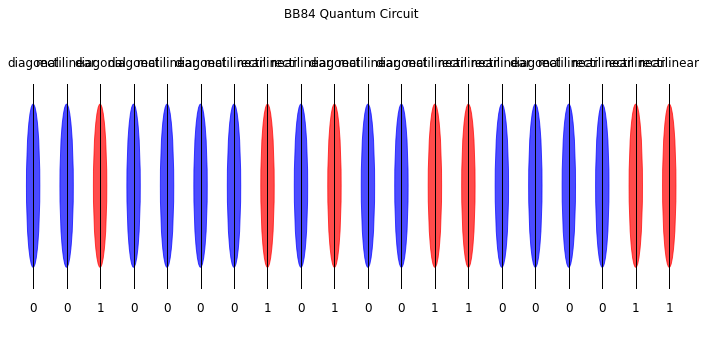

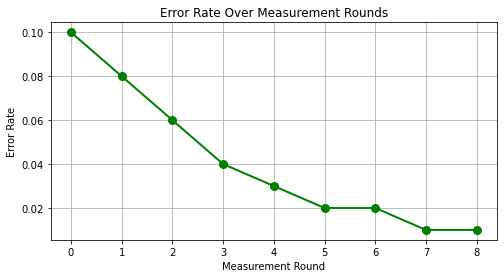

In [12]:
# Call the visualization function
visualize_circuit(alice_qubits, alice_bases, bob_measurements)

#error rate data (to be replaced with actual error rate data)
error_rates = [0.1, 0.08, 0.06, 0.04, 0.03, 0.02, 0.02, 0.01, 0.01]
plot_error_rate(error_rates)

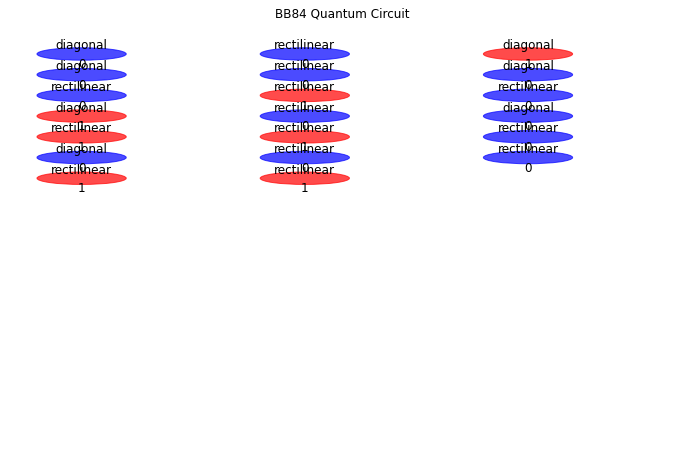

In [13]:
visualize_circuit_2(alice_qubits, alice_bases, bob_measurements)

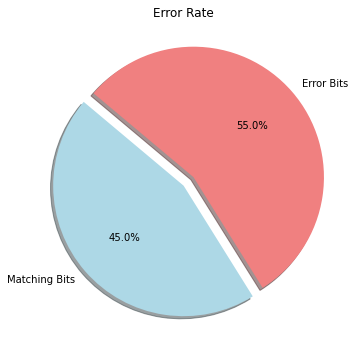

In [14]:
plot_error_pie_chart(error_rate)

### 10\. BB84 Protocol Flowchart

This code defines the nodes, edges, shapes, colors, and labels for the BB84 protocol flowchart. It uses NetworkX and Matplotlib to create and visualize the diagram. 

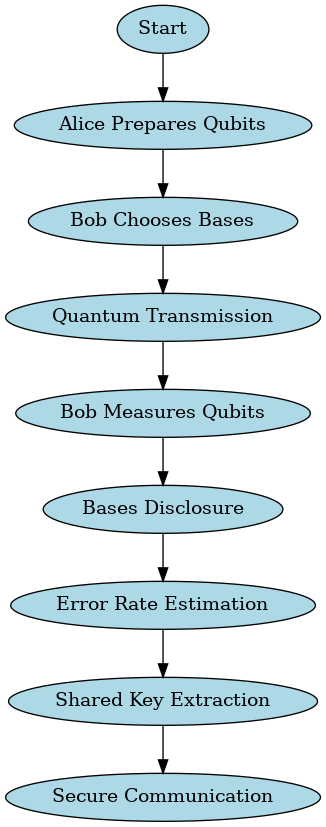

In [15]:

def create_bb84_flowchart():
    dot = Digraph(comment='BB84 Quantum Key Distribution Protocol', format='png')
    
    # Define nodes
    dot.node('Start', 'Start', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Alice', 'Alice Prepares Qubits', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Bob', 'Bob Chooses Bases', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Transmission', 'Quantum Transmission', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Measurement', 'Bob Measures Qubits', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Disclosure', 'Bases Disclosure', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Estimation', 'Error Rate Estimation', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Extraction', 'Shared Key Extraction', shape='ellipse', style='filled', fillcolor='lightblue')
    dot.node('Communication', 'Secure Communication', shape='ellipse', style='filled', fillcolor='lightblue')
    
    # Define edges
    edges = [('Start', 'Alice'), ('Alice', 'Bob'), ('Bob', 'Transmission'), 
             ('Transmission', 'Measurement'), ('Measurement', 'Disclosure'), 
             ('Disclosure', 'Estimation'), ('Estimation', 'Extraction'), 
             ('Extraction', 'Communication')]
    dot.edges(edges)
    
    # Render the flowchart to a PNG file
    dot.render('bb84_flowchart')

# Create and display the BB84 flowchart
create_bb84_flowchart()
Image(filename='bb84_flowchart.png')

### 11\. Performance Metrics

To evaluate the security and efficiency of simulated quantum cryptography protocols and algorithms, we can use various metrics. Here are some common metrics:

1.  Error Rate (QBER - Quantum Bit Error Rate): Calculate the error rate between Alice and Bob's keys. This metric measures how many bits of the keys do not match, providing an estimate of eavesdropping.

2.  Key Length: Measure the length of the final shared secret key between Alice and Bob. A longer key is generally more secure against attacks.

3.  Security Against Eavesdropping: Evaluate the security of the protocol by comparing the error rate with the expected error rate in the absence of eavesdropping. The protocol is considered secure if the error rate is below this threshold.

4.  Key Agreement Rate: Calculate the percentage of the original qubits that Alice and Bob were able to agree on and use as a shared key.

5.  Efficiency (Communication Overhead): Measure the number of qubits exchanged and the number of classical bits transmitted during the protocol. Evaluate how efficient the protocol is in terms of resource usage.

6.  Execution Time: Measure the time it takes to complete the entire protocol. This metric can help evaluate the efficiency of the simulation.

In [16]:
# Calculate the Error Rate (QBER)
def calculate_error_rate(alice_key, bob_key):
    error_bits = sum(a != b for a, b in zip(alice_key, bob_key))
    qber = error_bits / len(alice_key)
    return qber

# Calculate Key Length
def calculate_key_length(key):
    return len(key)

# Calculate Key Agreement Rate
def calculate_key_agreement_rate(alice_key, bob_key):
    matching_bits = sum(a == b for a, b in zip(alice_key, bob_key))
    key_agreement_rate = matching_bits / len(alice_key)
    return key_agreement_rate

qber = calculate_error_rate(alice_key, bob_key)
key_agreement_rate = calculate_key_agreement_rate(alice_key, bob_key)

# Calculate metrics
key_length = calculate_key_length(alice_key)
efficiency = len(alice_qubits) / key_length  # Assuming each qubit generates a key bit
security_threshold = 0.1  # Set a security threshold for QBER

# Check security and efficiency
if qber <= security_threshold:
    print("Protocol is secure.")
else:
    print("Protocol may not be secure due to high QBER.")

print(f"Key Length: {key_length}")
print(f"Error Rate (QBER): {qber:.4f}")
print(f"Key Agreement Rate: {key_agreement_rate:.2%}")
print(f"Efficiency (Qubits per Key Bit): {efficiency:.2f}")


Protocol may not be secure due to high QBER.
Key Length: 20
Error Rate (QBER): 0.5500
Key Agreement Rate: 45.00%
Efficiency (Qubits per Key Bit): 1.00
